# Data Analysis

In [18]:
import pandas as pd
import numpy as np
import os
import datetime
from itertools import chain
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from data_loader import convert_tsf_to_dataframe
import seaborn as sns
sns.set_style("whitegrid")

# M1 Dataset

In [15]:
# Yearly
m1_yearly_dataset_list = convert_tsf_to_dataframe(os.path.dirname(os.getcwd()) + '/data/m1_yearly_dataset.tsf')
m1_yearly_dataset_raw = m1_yearly_dataset_list[0]
m1_yearly_dataset_frequency  = m1_yearly_dataset_list[1]
m1_yearly_dataset_forecast_horizon = m1_yearly_dataset_list[2]
m1_yearly_dataset_contain_missing_values = m1_yearly_dataset_list[3]
m1_yearly_dataset_contain_equal_length = m1_yearly_dataset_list[4]
# Quarterly
m1_quarterly_dataset_list = convert_tsf_to_dataframe(os.path.dirname(os.getcwd()) + '/data/m1_quarterly_dataset.tsf')
m1_quarterly_dataset_raw = m1_quarterly_dataset_list[0]
m1_quarterly_dataset_frequency  = m1_quarterly_dataset_list[1]
m1_quarterly_dataset_forecast_horizon = m1_quarterly_dataset_list[2]
m1_quarterly_dataset_contain_missing_values = m1_quarterly_dataset_list[3]
m1_quarterly_dataset_contain_equal_length = m1_quarterly_dataset_list[4]
# Monthly
m1_monthly_dataset_list = convert_tsf_to_dataframe(os.path.dirname(os.getcwd()) + '/data/m1_monthly_dataset.tsf')
m1_monthly_dataset_raw = m1_monthly_dataset_list[0]
m1_monthly_dataset_frequency  = m1_monthly_dataset_list[1]
m1_monthly_dataset_forecast_horizon = m1_monthly_dataset_list[2]
m1_monthly_dataset_contain_missing_values = m1_monthly_dataset_list[3]
m1_monthly_dataset_contain_equal_length = m1_monthly_dataset_list[4]

In [66]:
test_dataset_list = convert_tsf_to_dataframe(os.path.dirname(os.getcwd()) + '/data/kaggle_web_traffic_weekly_dataset.tsf')
test_dataset_list[0]

,series_name,start_timestamp,series_value
0,T1,2015-07-01,"[79.0, 130.0, 74.0, 136.0, 76.0, 55.0, 84.0, 1..."
1,T2,2015-07-01,"[104.0, 226.0, 222.0, 123.0, 113.0, 111.0, 368..."
2,T3,2015-07-01,"[7.0, 20.0, 29.0, 35.0, 25.0, 21.0, 24.0, 11.0..."
3,T4,2015-07-01,"[196.0, 231.0, 181.0, 66.0, 129.0, 82.0, 210.0..."
4,T5,2015-07-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
145058,T145059,2015-07-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
145059,T145060,2015-07-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
145060,T145061,2015-07-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
145061,T145062,2015-07-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [8]:
m1_yearly_dataset = (
    m1_yearly_dataset_raw
    .assign(timestamp=lambda df: df.apply(lambda row: [(row.start_timestamp + relativedelta(months=i)).date() for i in range(0, len(row.series_value))], axis=1))
    .drop('start_timestamp', axis=1)
    .assign(timestamp_series_value=lambda df: df.apply(lambda row: list(zip(row['series_value'], row['timestamp'])), axis=1))
    .explode('timestamp_series_value')
    .assign(series_value=lambda df: df.apply(lambda row: row.timestamp_series_value[0], axis=1))
    .assign(timestamp=lambda df: df.apply(lambda row: row.timestamp_series_value[1], axis=1))
    .drop('timestamp_series_value', axis=1)
)
m1_quarterly_dataset = (
    m1_quarterly_dataset_raw
    .assign(timestamp=lambda df: df.apply(lambda row: [(row.start_timestamp + relativedelta(months=i)).date() for i in range(0, len(row.series_value))], axis=1))
    .drop('start_timestamp', axis=1)
    .assign(timestamp_series_value=lambda df: df.apply(lambda row: list(zip(row['series_value'], row['timestamp'])), axis=1))
    .explode('timestamp_series_value')
    .assign(series_value=lambda df: df.apply(lambda row: row.timestamp_series_value[0], axis=1))
    .assign(timestamp=lambda df: df.apply(lambda row: row.timestamp_series_value[1], axis=1))
    .drop('timestamp_series_value', axis=1)
)
m1_monthly_dataset = (
    m1_monthly_dataset_raw
    .assign(timestamp=lambda df: df.apply(lambda row: [(row.start_timestamp + relativedelta(months=i)).date() for i in range(0, len(row.series_value))], axis=1))
    .drop('start_timestamp', axis=1)
    .assign(timestamp_series_value=lambda df: df.apply(lambda row: list(zip(row['series_value'], row['timestamp'])), axis=1))
    .explode('timestamp_series_value')
    .assign(series_value=lambda df: df.apply(lambda row: row.timestamp_series_value[0], axis=1))
    .assign(timestamp=lambda df: df.apply(lambda row: row.timestamp_series_value[1], axis=1))
    .drop('timestamp_series_value', axis=1)
)

The M1 data is a dataset containing multiple types of data:
- Microeconomic data
- Industry data 
- Macroeconomic data
- Demographic data

The M1 data is divided into three different frequencies:
- yearly (181 series)
- quarterly (203 series)
- monthly (617 series)

The data comes from the paper "The Accuracy of Extrapolation (Time Series) Methods: Results of a Forecasting Competition (Makridakis, S., Andersen, A., Carbone, R. F., Fildes, R., Hibon, M., Lewandowski, R., Newton, J., Parzen, E., Winkler, R. L., 1982).

The original paper aimed to achieve a similar result to the Monash Time Series.

The 1001 time series selected aimed to covered a wide spectrum of possibilities, according to the authors, including different sources of statistical data and different starting/ending dates.


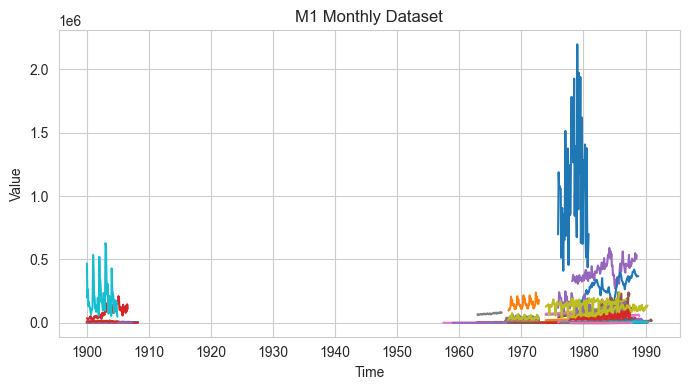

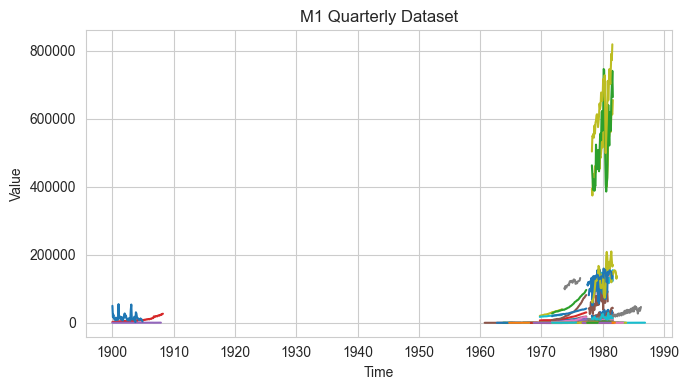

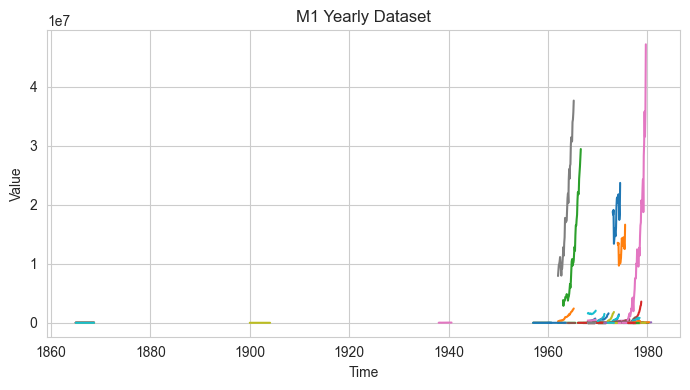

In [30]:
m1_monthly_dataset_plot = m1_monthly_dataset.pivot(index='timestamp', columns='series_name', values='series_value')
m1_quarterly_dataset_plot = m1_quarterly_dataset.pivot(index='timestamp', columns='series_name', values='series_value')
m1_yearly_dataset_plot = m1_yearly_dataset.pivot(index='timestamp', columns='series_name', values='series_value')
# Monthly
m1_monthly_dataset_plot.plot(legend=False, figsize=(7, 4))
plt.title('M1 Monthly Dataset')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()
# Quarterly
m1_quarterly_dataset_plot.plot(legend=False, figsize=(7, 4))
plt.title('M1 Quarterly Dataset')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()
# Yearly
m1_yearly_dataset_plot.plot(legend=False, figsize=(7, 4))
plt.title('M1 Yearly Dataset')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [60]:
(
    m1_monthly_dataset
    .groupby('series_name')
    .agg({
        'timestamp': ['min', 'max'],
        'series_value': ['mean', 'std', 'median', lambda x: x.quantile(.25), lambda x: x.quantile(.75)]
    })
    .set_axis(['timestamp_min', 'timestamp_max', 'mean', 'std', 'median', 'q1', 'q3'], axis=1)
    .assign(timestamp_length=lambda df: df.apply(lambda row: (row.timestamp_max - row.timestamp_min).days, axis=1))
    .assign(coef_variation=lambda df: df['std'] / df['mean'])
)


,timestamp_min,timestamp_max,mean,std,median,q1,q3,timestamp_length,coef_variation
series_name,,,,,,,,,
T1,1975-12-01,1980-11-01,1.091584e+06,419548.452600,1064800.0,805203.250,1.340282e+06,1797,0.384348
T10,1975-05-01,1987-10-01,5.966853e+03,1778.143159,5592.5,4729.000,6.804500e+03,4536,0.298003
T100,1977-12-01,1988-07-01,4.693125e+02,135.944798,451.5,410.000,5.540000e+02,3865,0.289668
T101,1977-12-01,1984-11-01,1.476571e+01,0.781167,14.8,14.305,1.515750e+01,2527,0.052904
T102,1977-01-01,1983-06-01,1.346208e+04,3667.008210,13719.0,10367.000,1.639025e+04,2342,0.272395
...,...,...,...,...,...,...,...,...,...
T95,1977-12-01,1984-01-01,4.894054e+02,164.529959,501.5,366.250,5.960000e+02,2222,0.336183
T96,1977-12-01,1984-01-01,1.895743e+03,614.481919,1855.0,1419.000,2.369250e+03,2222,0.324138
T97,1977-12-01,1984-01-01,1.117838e+02,45.634423,113.0,72.000,1.487500e+02,2222,0.408238
